# Install TensorFlow and TensorFlow Datasets

In [ ]:
pip install tensorflow tensorflow-datasets

 # Load the Dataset

In [ ]:
import tensorflow_datasets as tfds
# Load the dataset
def load_dataset():
    (train_data, validation_data, test_data), dataset_info = tfds.load(
        'oxford_flowers102',
        split=['train', 'validation', 'test'],
        as_supervised=True,  # Load the data in a supervised format (image, label)
        with_info=True  # Get information about the dataset
    )
    return train_data, validation_data, test_data, dataset_info

train_data, validation_data, test_data, dataset_info = load_dataset()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompletePS7RLD/oxford_flowers102-train.tfrecord*…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompletePS7RLD/oxford_flowers102-test.tfrecord*.…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompletePS7RLD/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


# Inspect the Dataset

In [ ]:
print("Dataset info:", dataset_info)
print("Number of training samples:", len(train_data))
print("Number of validation samples:", len(validation_data))
print("Number of test samples:", len(test_data))


Dataset info: tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/da

# Visualize the Data

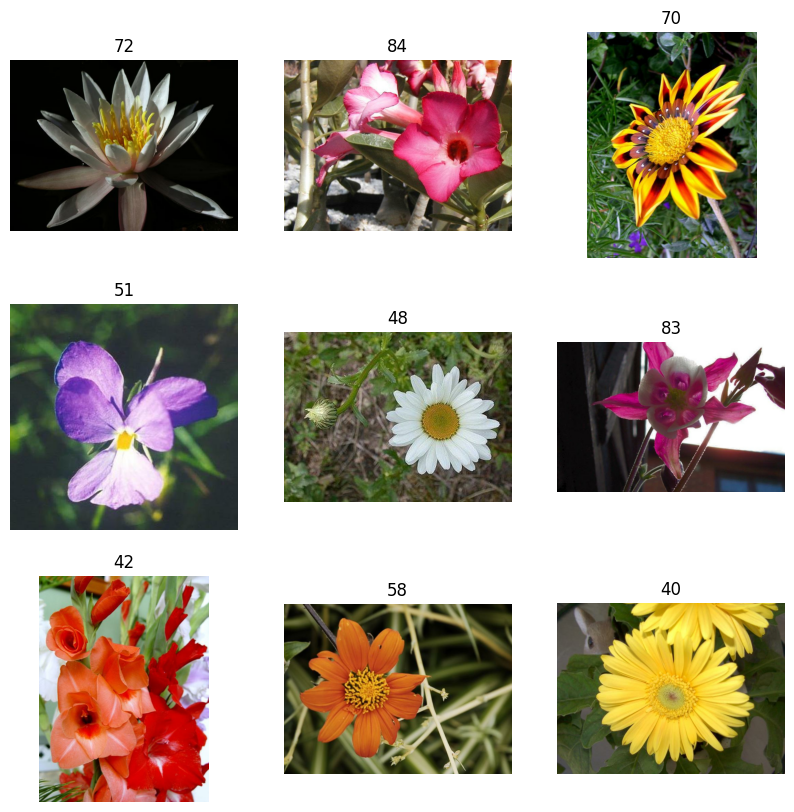

In [ ]:
import matplotlib.pyplot as plt

def show_examples(dataset, n_images):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(n_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(int(label))
        plt.axis("off")

show_examples(train_data, 9)


# Preprocess the Data

In [ ]:
import tensorflow as tf

def preprocess_dataset(dataset, batch_size=32):
    # Resize images to a fixed size, normalize and batch the dataset
    return dataset.map(lambda x, y: (tf.image.resize(x, [256, 256]) / 256.0, y)).batch(batch_size)

train_data = preprocess_dataset(train_data)
validation_data = preprocess_dataset(validation_data)
test_data = preprocess_dataset(test_data)


# Define the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(102, activation='softmax')  # 102 classes in the Oxford Flowers dataset
    ])
    return model

model = create_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

# Complie the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train the model

In [ ]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10  # You can adjust the number of epochs based on your specific needs
)


Epoch 1/10
32/32 [==============================] - 18s 313ms/step - loss: 4.9328 - accuracy: 0.0088 - val_loss: 4.5554 - val_accuracy: 0.0137
Epoch 2/10
32/32 [==============================] - 4s 133ms/step - loss: 4.4654 - accuracy: 0.0176 - val_loss: 4.3524 - val_accuracy: 0.0294
Epoch 3/10
32/32 [==============================] - 5s 160ms/step - loss: 4.1721 - accuracy: 0.0500 - val_loss: 4.1094 - val_accuracy: 0.0618
Epoch 4/10
32/32 [==============================] - 4s 136ms/step - loss: 3.5675 - accuracy: 0.1686 - val_loss: 3.9786 - val_accuracy: 0.0775
Epoch 5/10
32/32 [==============================] - 5s 162ms/step - loss: 2.2297 - accuracy: 0.4461 - val_loss: 4.6053 - val_accuracy: 0.0814
Epoch 6/10
32/32 [==============================] - 6s 189ms/step - loss: 1.2270 - accuracy: 0.6980 - val_loss: 5.6921 - val_accuracy: 0.0941
Epoch 7/10
32/32 [==============================] - 4s 136ms/step - loss: 0.8307 - accuracy: 0.7951 - val_loss: 5.8027 - val_accuracy: 0.0882
Epoch

# Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test accuracy:", test_accuracy)


193/193 [==============================] - 13s 69ms/step - loss: 7.8475 - accuracy: 0.0665
Test accuracy: 0.06651487946510315


# Visualization and Analysis

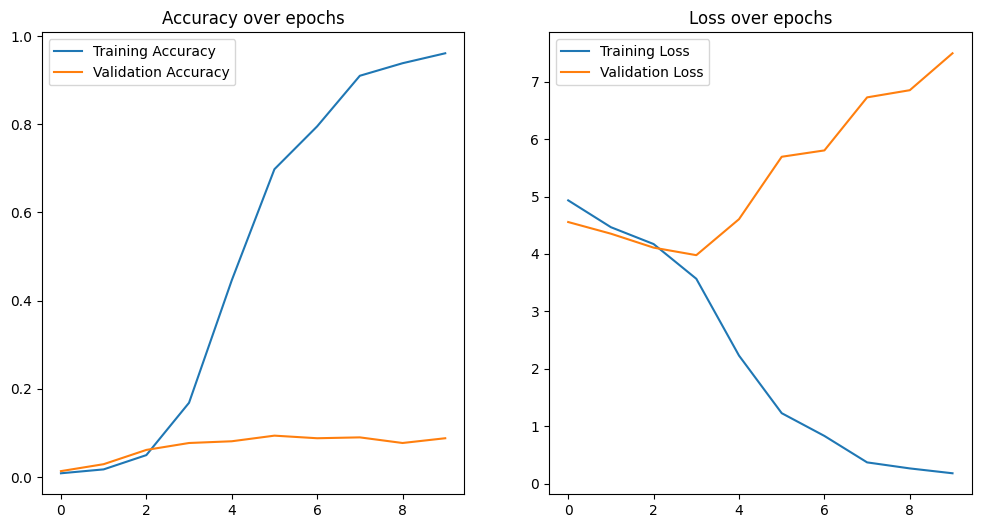

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()

plot_history(history)


# Advanced Model Architecture Using Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def create_transfer_learning_model():
    # Load VGG16 pre-trained on ImageNet data
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False  # Freeze the convolutional base

    # Add new layers on top of VGG16
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(102, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

model = create_transfer_learning_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Model training

In [ ]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10  # Adjust based on when you see the validation loss stabilize
)


Epoch 1/10
32/32 [==============================] - 11s 315ms/step - loss: 4.7263 - accuracy: 0.0196 - val_loss: 4.4242 - val_accuracy: 0.0775
Epoch 2/10
32/32 [==============================] - 10s 318ms/step - loss: 4.2735 - accuracy: 0.1353 - val_loss: 4.0125 - val_accuracy: 0.1990
Epoch 3/10
32/32 [==============================] - 10s 318ms/step - loss: 3.7830 - accuracy: 0.2578 - val_loss: 3.5593 - val_accuracy: 0.2667
Epoch 4/10
32/32 [==============================] - 10s 319ms/step - loss: 3.2754 - accuracy: 0.3373 - val_loss: 3.1603 - val_accuracy: 0.3275
Epoch 5/10
32/32 [==============================] - 10s 323ms/step - loss: 2.8334 - accuracy: 0.4186 - val_loss: 2.8514 - val_accuracy: 0.3794
Epoch 6/10
32/32 [==============================] - 10s 316ms/step - loss: 2.4720 - accuracy: 0.4922 - val_loss: 2.6155 - val_accuracy: 0.4216
Epoch 7/10
32/32 [==============================] - 10s 318ms/step - loss: 2.1737 - accuracy: 0.5667 - val_loss: 2.4261 - val_accuracy: 0.4618

# Model evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test accuracy:", test_accuracy)


193/193 [==============================] - 32s 164ms/step - loss: 2.2292 - accuracy: 0.4890
Test accuracy: 0.4890226125717163


# Visualization of Training Progress

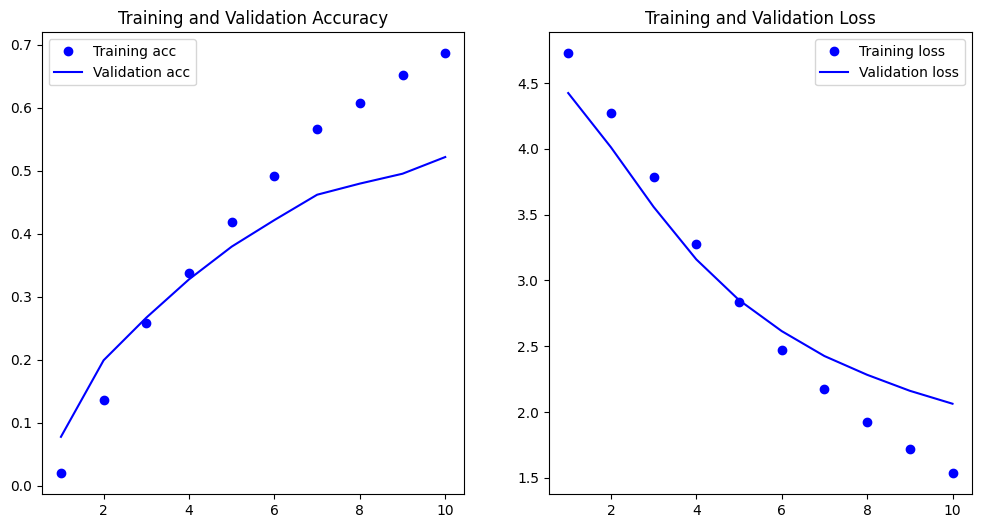

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)
